In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
df = pd.read_excel("lophoc.xlsx", sheet_name='data')
df

,Sức khỏe,Thời tiết,Kết quả
0,ốm,u ám,nghỉ
1,ốm,mưa,nghỉ
2,ốm,nắng,nghỉ
3,ốm,u ám,học
4,tốt,u ám,học
5,tốt,mưa,học
6,tốt,nắng,nghỉ


In [16]:
# Tạo dữ liệu Input (đặc trưng) và Output (Mục tiêu)
X = df.iloc[:, :-1]  # Tất cả các cột trừ cột cuối
y = df.iloc[:, -1]   # Cột cuối là mục tiêu

X

,Sức khỏe,Thời tiết
0,ốm,u ám
1,ốm,mưa
2,ốm,nắng
3,ốm,u ám
4,tốt,u ám
5,tốt,mưa
6,tốt,nắng


In [17]:
y

0    nghỉ
1    nghỉ
2    nghỉ
3     học
4     học
5     học
6    nghỉ
Name: Kết quả, dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
enHealth = LabelEncoder()

X['Sức khỏe']= enHealth.fit_transform(X['Sức khỏe'])

enWeather = LabelEncoder()
X['Thời tiết']= enWeather.fit_transform(X['Thời tiết'])
X


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2372\2882001989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sức khỏe']= enHealth.fit_transform(X['Sức khỏe'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2372\2882001989.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Thời tiết']= enWeather.fit_transform(X['Thời tiết'])


,Sức khỏe,Thời tiết
0,1,2
1,1,0
2,1,1
3,1,2
4,0,2
5,0,0
6,0,1


In [19]:
# Cột Sức khỏe:
    # ốm → 1
    # tốt → 0
# Cột Thời tiết:
    # u ám → 2
    # mưa → 0
    # nắng → 1

##### Train data: Dùng để huấn luyện (train) mô hình (80%).
##### Test data: Dùng để kiểm tra (test) hiệu quả mô hình (20%).

In [20]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)



In [21]:
# Xây dựng mô hình Cây Quyết Định
modelDT = DecisionTreeClassifier(criterion="entropy", random_state=34, max_depth=5)  # Giới hạn độ sâu cây
modelDT = modelDT.fit(X_train, y_train)


In [22]:
X_train

,Sức khỏe,Thời tiết
4,0,2
6,0,1
5,0,0
2,1,1
1,1,0


In [23]:
y_train

4     học
6    nghỉ
5     học
2    nghỉ
1    nghỉ
Name: Kết quả, dtype: object

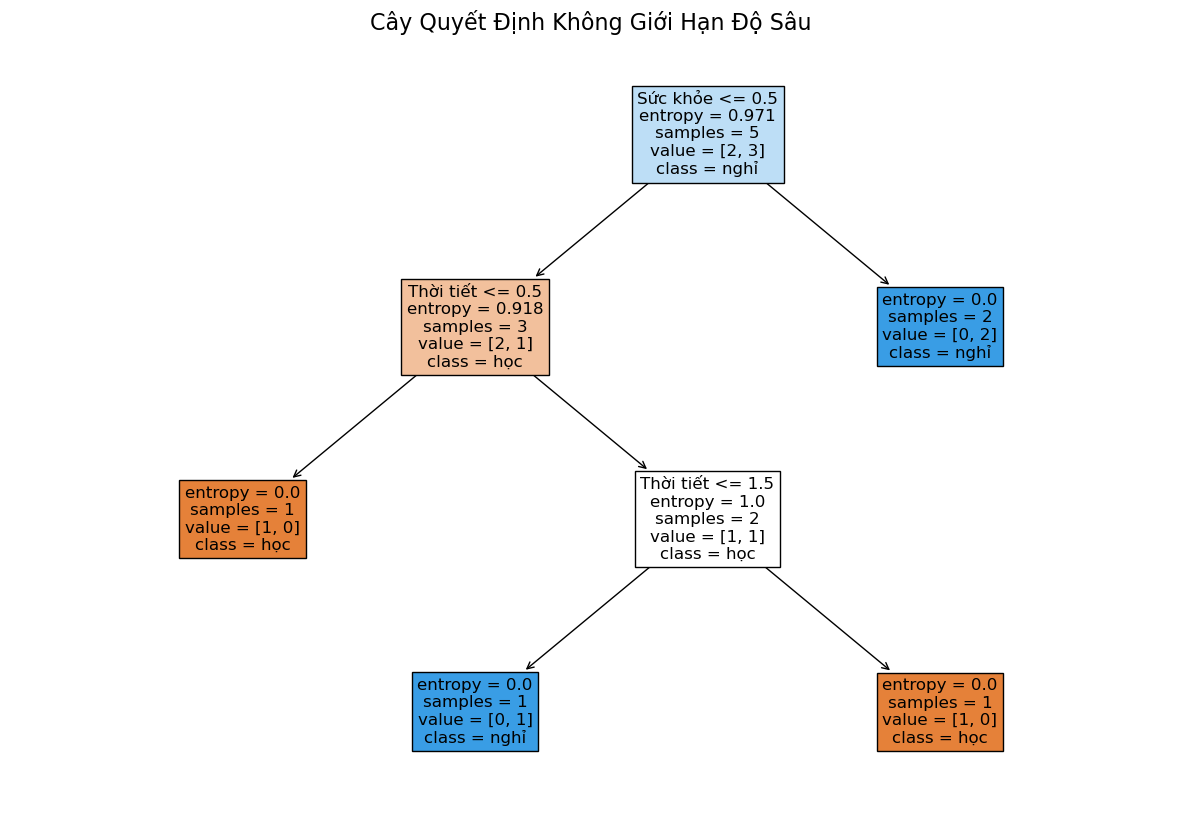

In [24]:

# Vẽ Cây Quyết Định
plt.figure(figsize=(15, 10))
plot_tree(
    modelDT,
    feature_names=['Sức khỏe', 'Thời tiết'],
    class_names=['học', 'nghỉ'],
    filled=True,
    fontsize=12
)
plt.title("Cây Quyết Định Không Giới Hạn Độ Sâu", fontsize=16)
plt.show()
# P(học) = 2/5 = A 
# P(nghỉ) = 3/5 = B 
# Entropy = -(A x log2(A) + B x log2(B))  = -(2/5 x log2(2/5) + 3/5 x log2(3/5)) = 0.971

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dự đoán
y_pred = modelDT.predict(X_test)

# Đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.5


In [26]:

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[0 1]
 [0 1]]


In [27]:

# Báo cáo phân loại
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['học', 'nghỉ']))


Classification Report:
               precision    recall  f1-score   support

         học       0.00      0.00      0.00         1
        nghỉ       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:

# Độ sâu của cây
print("Tree Depth:", modelDT.get_depth())
print("Number of Leaves:", modelDT.get_n_leaves())

Tree Depth: 3
Number of Leaves: 4
